# General probabilistic 1D linear regression experiments

When data is generated from a GP, it is unsurprising that a GP performs well and this also applies to other models. However, when the true data generating distribution is more unusual, how does directly targeting the predictive distribution compare to Bayesian approaches?

## Setup

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
# import torch
# import gpytorch
# import torch.nn as nn
# import torch.optim as optim
# from torch.utils.data import DataLoader, TensorDataset

In [6]:
colors = ["royalblue", "red", "orange"]

## Gaussian with heteroscedastic variance

In [7]:
sigma = np.vectorize(lambda x : 0.05*(np.exp((1-2*x**2)*np.sin(7*x)))**1.2)
mu = np.vectorize(lambda x : -0.5 * x * np.sin(10*x))

n = 1000
x = np.random.uniform(0, 1, n)
y = np.random.normal(mu(x), sigma(x))

In [8]:
x_vals = np.linspace(0, 1, 200)
mu_vals = mu(x_vals)
sigma_vals = sigma(x_vals)

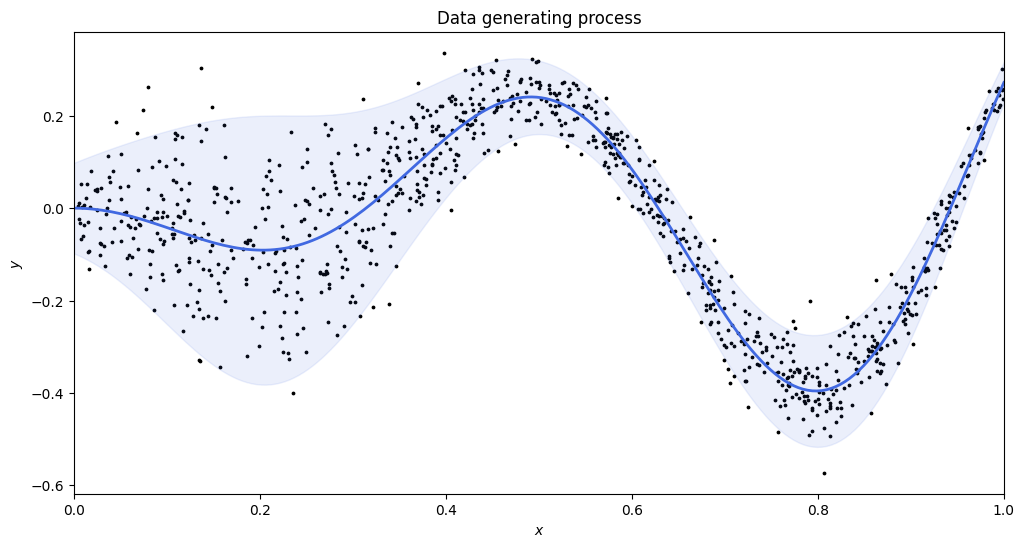

In [10]:
norm_crit = norm.ppf(0.975)

plt.figure(figsize=(12,6))
plt.scatter(x, y, s=3, color="black")
plt.fill_between(x_vals, mu_vals-norm_crit*sigma_vals, mu_vals+norm_crit*sigma_vals, color=colors[0], alpha=0.1)
plt.plot(x_vals, mu_vals, color=colors[0], linewidth=2)
plt.xlim(0,1)
plt.xlabel("$x$"); plt.ylabel("$y$")
plt.title("Data generating process")
plt.show()

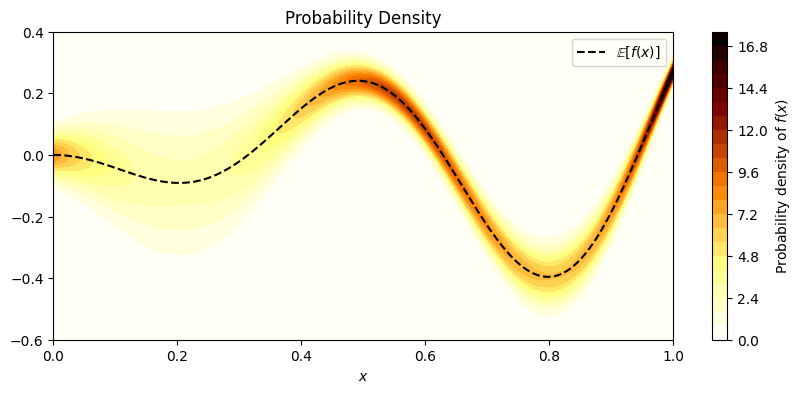

In [12]:
m = 1000
x_mesh, y_mesh = np.meshgrid(np.linspace(0, 1, m), np.linspace(-0.6, 0.4, m))
Z = norm(mu(x_mesh), sigma(x_mesh)).pdf(y_mesh)

plt.figure(figsize=(10,4))
plt.plot(x_vals, mu_vals, color="black", linestyle="--", label="$\mathbb{E}[f(x)]$")
contour = plt.contourf(x_mesh, y_mesh, Z, levels=25, cmap="afmhot_r") 
plt.colorbar(contour, label="Probability density of $f(x)$")
plt.xlim(0,1)
plt.title("Probability Density")
plt.legend()
plt.xlabel("$x$")
plt.show()

### GP model